In [1]:
from scipy.spatial import distance
import numpy as np
import pandas as pd

# import plotting libraries
from mpl_toolkits.mplot3d.axes3d import Axes3D

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.preprocessing import normalize
np.set_printoptions(precision=6)

#### Simple matrix

In [2]:
A = np.matrix([[2, 0], 
               [0, 3]])
A

matrix([[2, 0],
        [0, 3]])

In [4]:
evals, evecs = np.linalg.eig(A)

In [5]:
# print the eigen values
evals

array([2., 3.])

In [6]:
# print the eigen vectors
evecs

matrix([[1., 0.],
        [0., 1.]])

The first eigenvalue, 2, is associated with the eigenvector in the first column (1, 0)

Equation of the line through (0,0) and (1,0) is 𝑦=0. So, any point on this line when multiplied by the transformation matrix 𝐴, will be scaled by 2.

The second eigenvalue, 3, is associated with the eigenvector in the second column (0, 1)

Similarly, for the second eigenvalue, any point on the line 𝑥=0 will be scaled by 3.

#### let us choose a complex matrix ...

In [7]:
# Consider the matrix of 8 observations each of 2 
# variables, x1 and x2 ; # whose observed values are held in the 2 rows 
# of the array X:

X = np.array([ [ 1, 1,  2,   -1, -1.5, .9,  1.3, -.6, 1.9, 2.2],
               [.5, .8, 1.6, .8,   -1, .9,  -.9,  1,  1.5, 1.7]
             ])

In [8]:
# get the Co variance matrix 
COV = np.cov(X)
COV

array([[1.708444, 0.651333],
       [0.651333, 0.898778]])

In [9]:
evals, evecs = np.linalg.eig(COV)

In [25]:
evals

array([2.070504, 0.536718])

In [10]:
evecs

array([[ 0.874039, -0.485856],
       [ 0.485856,  0.874039]])

#### To plot the eigenvectors, we calculate the gradient:

In [11]:
x_v1 = evecs[:, 0][0]
y_v1 = evecs[:, 0][1]

x_v2 = evecs[:, 1][0]
y_v2 = evecs[:, 1][1]

In [12]:
m1 = np.round(y_v1/x_v1, 4) # Gradient of 1st eigenvector
m2 = np.round(y_v2/x_v2, 4) # Gradient of 2nd eigenvector

In [13]:
m1* m2

-1.0000641

So, our eigenvectors, which span all vectors along the line through the origin, have the equations: 
- 𝑦 = m1 * 𝑥 (𝑒1) 
- y = m2 * 𝑥 (𝑒2)

In [14]:
x = np.linspace(-4, 4, 100)

y1 = m1 * x
y2 = m2 * x

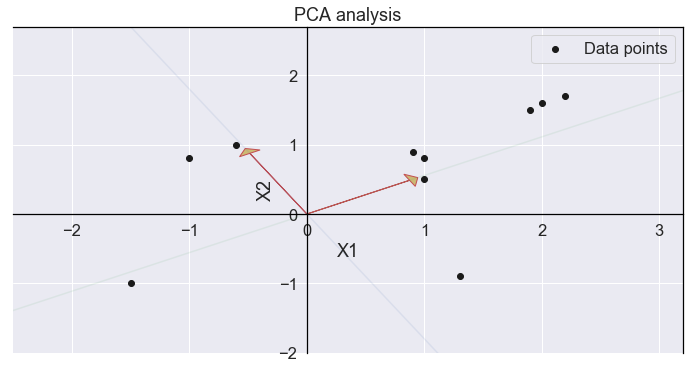

In [15]:
f, ax = plt.subplots(figsize=(12, 6))

# plot the random number
ax.scatter(X[0], X[1], c='k', label='Data points')
ax.plot(x, y1, alpha=.1, c='g')
ax.plot(x, y2, alpha=.1)

ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')

ax.arrow(0, 
         0, 
         x_v1, 
         y_v1, 
         head_width = .2, 
         head_length= .08, 
         fc='y', 
         ec='r',
         alpha = 1
         );

ax.arrow(0, 
         0, 
         x_v2, 
         y_v2, 
         head_width = .2, 
         head_length= .08, 
         fc='y', 
         ec='r',
         alpha = 1
         );

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('PCA analysis')
ax.set_xlim(X[0].min() -1, X[0].max() + 1)
ax.set_ylim(X[1].min() -1, X[1].max() + 1)
ax.legend();